In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [74]:
df=pd.read_csv("telco_churn_prediction.csv")

In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.shape

(7043, 21)

# drop the columns of the customer id because this columns is not impact on the prediction result

In [77]:
df.drop("customerID",axis="columns",inplace=True)

In [78]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# this method is used to drop the nan values in the columns 

In [79]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["TotalCharges"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [80]:
df.shape

(7043, 20)

In [81]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [83]:
##df['TotalCharges'] = df['TotalCharges'].astype("float")

In [84]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
missing_data = df.isnull()
missing_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())#"True" means the value is a missing value while "False" means the value is not a missing value.
    print("") 

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBilling, dtype: int64

PaymentMethod
False    7043
Name: Paym

In [87]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [88]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [89]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

# Hmmm... some values seems to be not numbers but blank string. Let's find out such rows

In [90]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [91]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [201]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)#if you have not the missing value  then we can go through this method

In [94]:
df.iloc[488].TotalCharges


' '

In [95]:
df[df.TotalCharges!=' '].shape

(7032, 20)

# Remove rows with space in TotalCharges

In [96]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [97]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [98]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Basit Gondal\AppData\Local\Temp\ipykernel_10128\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [99]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [100]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


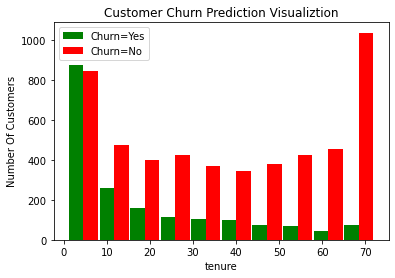

In [101]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [102]:
df1.groupby("tenure")["Churn"].value_counts()

tenure  Churn
1       Yes      380
        No       233
2       Yes      123
        No       115
3       No       106
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: Churn, Length: 144, dtype: int64

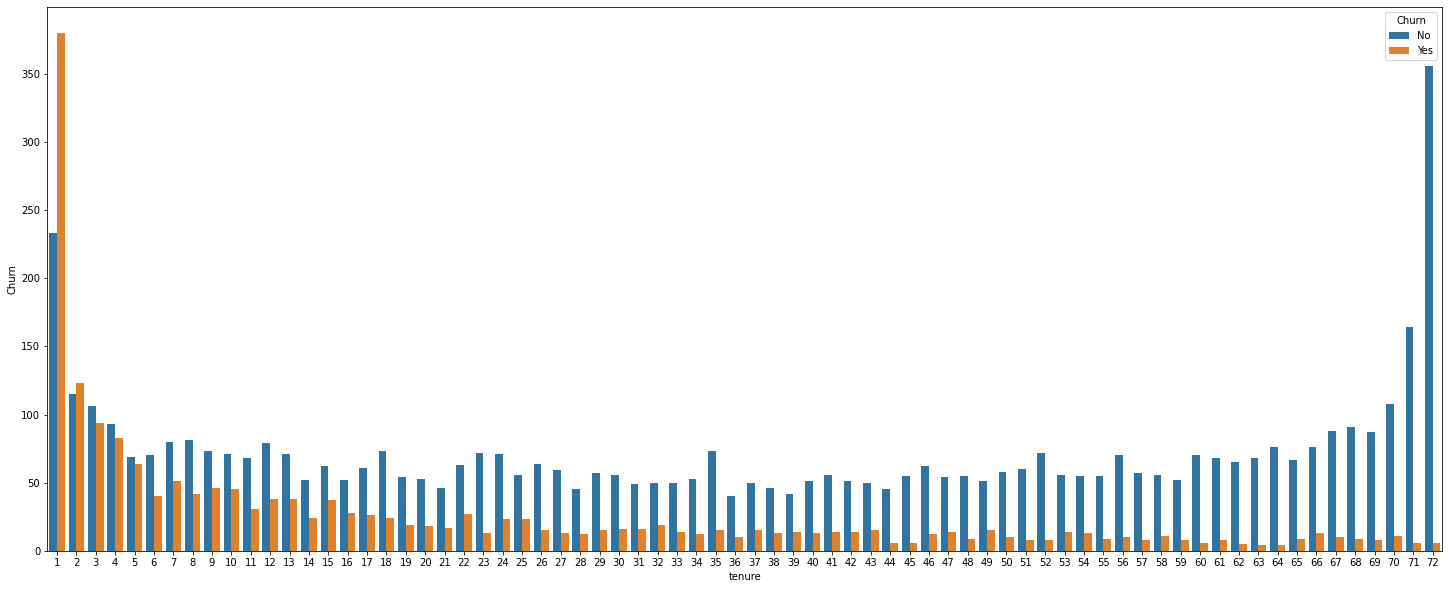

In [103]:
plt.figure(figsize=(25,10))

sns.countplot(x="tenure",hue="Churn",data=df1)
plt.xlabel("tenure")
plt.ylabel("Churn")
plt.show()

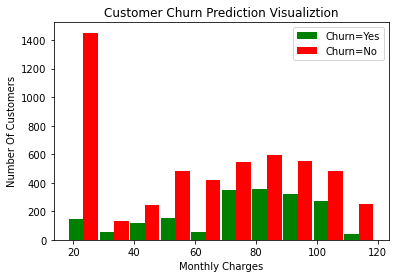

In [104]:
mc_churn_no = df1[df1["Churn"]=='No'].MonthlyCharges      
mc_churn_yes = df1[df1["Churn"]=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [105]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [106]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [107]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Basit Gondal\AppData\Local\Temp\ipykernel_10128\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Basit Gondal\AppData\Local\Temp\ipykernel_10128\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [108]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Convert Yes and No to 1 or 0

In [109]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Basit Gondal\AppData\Local\Temp\ipykernel_10128\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [110]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [111]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Basit Gondal\AppData\Local\Temp\ipykernel_10128\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [113]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [114]:
df1.gender.unique()

array([1, 0], dtype=int64)

# One hot encoding for categorical columns

In [115]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [116]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
751,0,0,1,1,70,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
4841,1,0,0,0,24,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3208,0,0,1,0,48,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
5507,1,0,0,0,28,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
1528,1,0,0,0,19,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [117]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [118]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [119]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [120]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [121]:
x_train.shape

(5625, 26)

In [122]:
x_test.shape

(1407, 26)

In [123]:
x_train[:10]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [124]:
len(x_train.columns)

26

# Build a model (ANN) in tensorflow/keras

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [126]:
#LETS initialize the ANN model
Classifier=Sequential()

# addd the input layer

In [127]:
Classifier.add(Dense(units=26,activation="relu"))

# add the first hidden layer

In [128]:
Classifier.add(Dense(units=15,activation="relu"))
Classifier.add(Dropout(0.2))#dropout means the model cannot be overfitted

# adding the second hidden layer

In [129]:
Classifier.add(Dense(units=10,activation="relu"))
Classifier.add(Dropout(0.3))#dropout means the model cannot be overfitted

# adding the output layer

In [130]:
Classifier.add(Dense(units=1,activation="sigmoid"))#dense means how many the neural network created

# training the neural network

In [131]:
Classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#by default in adam also has the learning rate

# you can also add the learning rate

In [132]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [133]:
Classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [134]:
model_histry=Classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
377/377 [==============================] - 9s 13ms/step - loss: 0.4728 - accuracy: 0.7742 - val_loss: 0.4513 - val_accuracy: 0.7911
Epoch 2/50
377/377 [==============================] - 4s 10ms/step - loss: 0.4436 - accuracy: 0.7765 - val_loss: 0.4586 - val_accuracy: 0.7970
Epoch 3/50
377/377 [==============================] - 4s 10ms/step - loss: 0.4401 - accuracy: 0.7919 - val_loss: 0.4306 - val_accuracy: 0.8045
Epoch 4/50
377/377 [==============================] - 4s 10ms/step - loss: 0.4324 - accuracy: 0.7964 - val_loss: 0.4402 - val_accuracy: 0.7981
Epoch 5/50
377/377 [==============================] - 4s 10ms/step - loss: 0.4322 - accuracy: 0.7988 - val_loss: 0.4351 - val_accuracy: 0.7970
Epoch 6/50
377/377 [==============================] - 4s 10ms/step - loss: 0.4286 - accuracy: 0.8002 - val_loss: 0.4442 - val_accuracy: 0.7948
Epoch 7/50
377/377 [==============================] - 4s 10ms/step - loss: 0.4231 - accuracy: 0.8004 - val_loss: 0.4537 - val_accuracy: 0.8024

# early stopping

In [135]:
#if the model of the accuracy not increase and model stack the same accuracy so you can early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [136]:
model_histry=Classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3713 - accuracy: 0.8246 - val_loss: 0.6710 - val_accuracy: 0.7776
Epoch 2/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3726 - accuracy: 0.8203 - val_loss: 0.7818 - val_accuracy: 0.7798
Epoch 3/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3809 - accuracy: 0.8174 - val_loss: 0.6872 - val_accuracy: 0.7846
Epoch 4/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3739 - accuracy: 0.8222 - val_loss: 0.6620 - val_accuracy: 0.7835
Epoch 5/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3755 - accuracy: 0.8238 - val_loss: 0.9288 - val_accuracy: 0.7954
Epoch 6/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3774 - accuracy: 0.8225 - val_loss: 0.8211 - val_accuracy: 0.7771
Epoch 7/1000
377/377 [==============================] - 4s 10ms/step - loss: 0.3666 - accuracy: 0.8235 - val_loss: 0.6237 - val_ac

In [137]:
model_histry.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

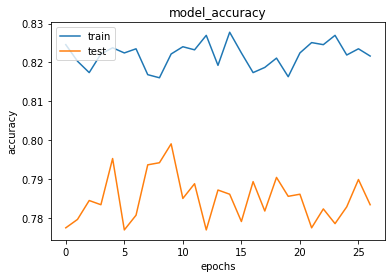

In [138]:
plt.plot(model_histry.history["accuracy"])
plt.plot(model_histry.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train","test"],loc="upper left")
plt.title("model_accuracy")
plt.show()

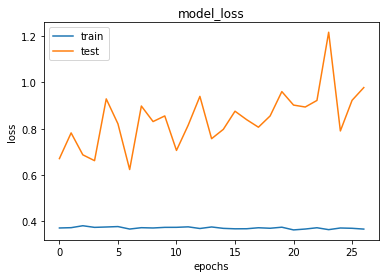

In [139]:
plt.plot(model_histry.history["loss"])
plt.plot(model_histry.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["train","test"],loc="upper left")
plt.title("model_loss")
plt.show()

# prediction

In [140]:
y_pred=Classifier.predict(x_test)
y_pred[:5]

44/44 [==============================] - 1s 5ms/step


array([[1.6412786e-04],
       [3.0253044e-01],
       [3.5017383e-19],
       [6.1226875e-01],
       [3.4215730e-01]], dtype=float32)

In [141]:
y_prediction = []
for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [142]:
y_prediction[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [143]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [144]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       999
           1       0.65      0.43      0.52       408

    accuracy                           0.77      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.75      0.77      0.75      1407



Text(69.0, 0.5, 'Truth')

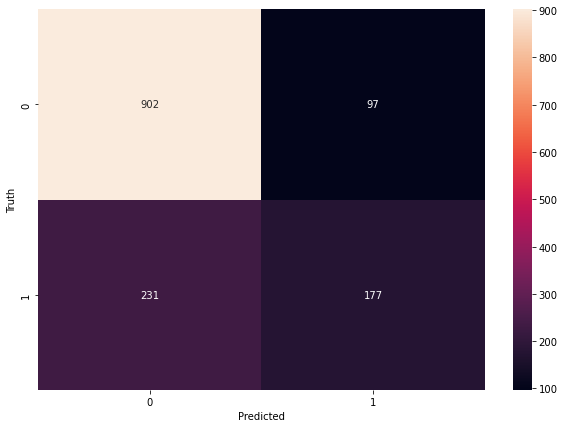

In [145]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [146]:
y_test.shape

(1407,)

In [147]:
#Accuracy

In [148]:
y_pred=Classifier.predict(x_test)
y_pred=(y_pred>=0.5)# y_pred>=0.5 means the the value greter then 0.5 so the value is 1 

44/44 [==============================] - 0s 5ms/step


In [149]:
y_pred[:5]

array([[False],
       [False],
       [False],
       [ True],
       [False]])

In [151]:
Classifier.evaluate(x_test, y_test)

44/44 [==============================] - 0s 6ms/step - loss: 0.7904 - accuracy: 0.7669


[0.7904431223869324, 0.7668798565864563]

In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
#bank churn prediction

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv("Churn_Modelling.csv")

In [156]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [157]:
df.shape

(10000, 14)

In [158]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [159]:
df.drop(["RowNumber","CustomerId","Surname"],axis="columns",inplace=True)

In [160]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [161]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [162]:
df.dropna(subset=["Exited"],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [163]:
df.shape

(10000, 11)

In [164]:
missing_data = df.isnull()
missing_data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [165]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())#"True" means the value is a missing value while "False" means the value is not a missing value.
    print("") 

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

<Figure size 1800x1800 with 0 Axes>

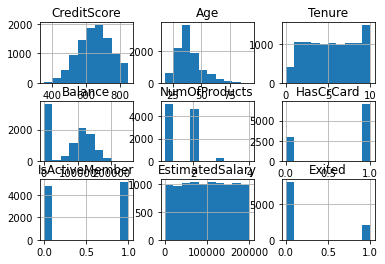

In [166]:
plt.figure(figsize=(25,25))
df.hist()

In [167]:
df.groupby("Exited").value_counts()

Exited  CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
0       405          Germany    Male    31   5       133299.67  2              1          1               72950.14           1
        750          Germany    Female  37   1       133199.71  2              1          1               27366.77           1
                     France     Female  35   3       0.00       1              1          0               191520.50          1
                                        38   1       0.00       2              1          0               47764.99           1
                                Male    22   5       0.00       2              0          1               105125.65          1
                                                                                                                            ..
1       551          Germany    Male    50   1       121399.98  1              0          1               84508.44  

In [168]:
df.groupby("Age")["Exited"].value_counts()

Age  Exited
18   0         20
     1          2
19   0         26
     1          1
20   0         38
               ..
84   0          1
     1          1
85   0          1
88   0          1
92   0          2
Name: Exited, Length: 128, dtype: int64

Text(0, 0.5, 'Exited')

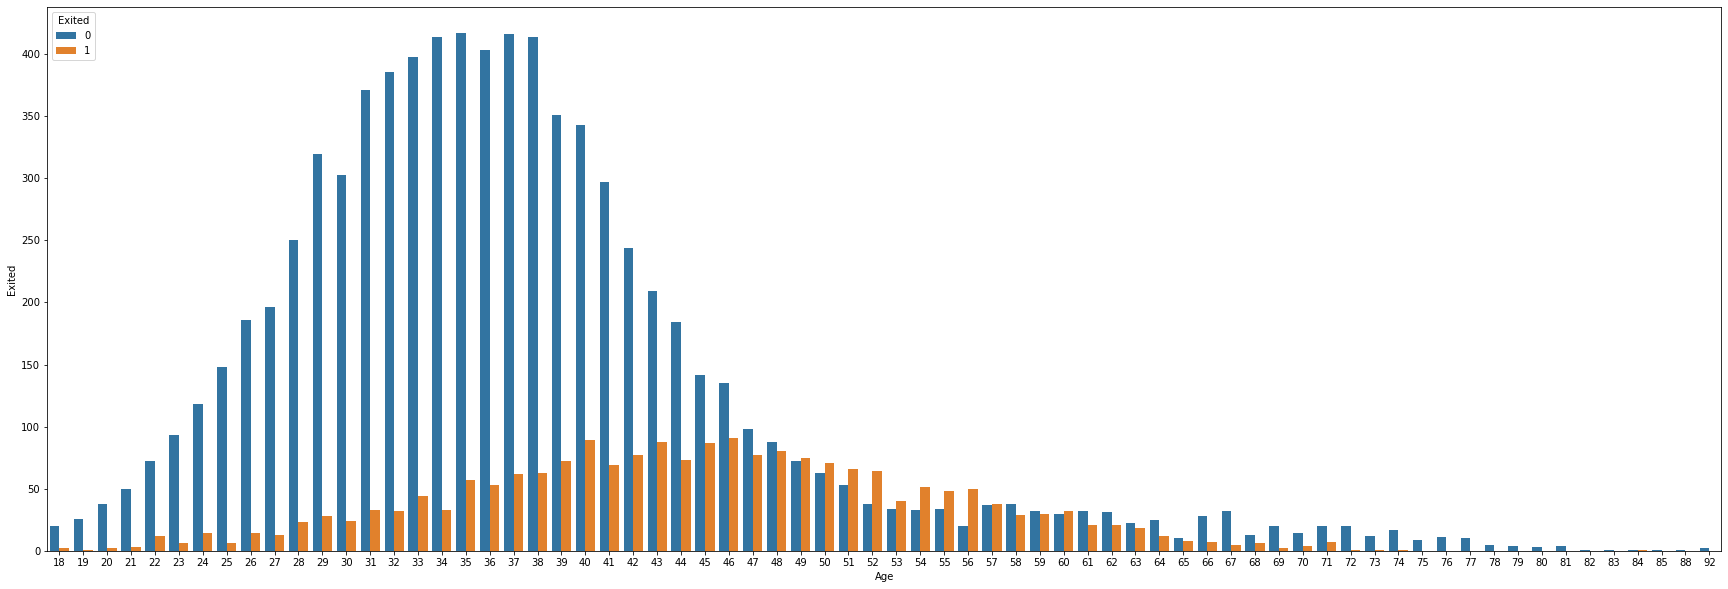

In [169]:
plt.figure(figsize=(30,10))
sns.countplot(x="Age",hue="Exited",data=df)
plt.xlabel("Age")
plt.ylabel("Exited")

In [170]:
df2 = pd.get_dummies(data=df, columns=['Gender','Geography'])
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [171]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


# scaling the feature

In [172]:
cols_to_scale=["CreditScore","Balance","EstimatedSalary"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [173]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.538,42,2,0.000000,1,1,1,0.506735,1,1,0,1,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,1,0,0,0,1
2,0.304,42,8,0.636357,3,1,0,0.569654,1,1,0,1,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,1,0,1,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,1,0,0,0,1


In [174]:
x = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [175]:
x_train.shape

(8000, 13)

In [176]:
len(x_train.columns)

13

# build the neural network

In [177]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [178]:
classifier=Sequential()


# add the input layer of the neural network

In [179]:
classifier.add(Dense(units=13,activation="relu"))


# add the first hidden layers

In [180]:
classifier.add(Dense(units=8,activation="relu"))
classifier.add(Dropout(0.2))

# add the second hidden layer

In [181]:
classifier.add(Dense(units=4,activation="relu"))
classifier.add(Dropout(0.3))

# add the output layer

In [182]:
classifier.add(Dense(units=1,activation="sigmoid"))

# training the model

In [183]:
classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

# you can also add the learning rate

In [184]:
import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [185]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [186]:
model_histry=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 9s 11ms/step - loss: 0.5181 - accuracy: 0.7914 - val_loss: 0.5108 - val_accuracy: 0.7978
Epoch 2/50
536/536 [==============================] - 5s 9ms/step - loss: 0.5092 - accuracy: 0.7951 - val_loss: 0.5034 - val_accuracy: 0.7978
Epoch 3/50
536/536 [==============================] - 5s 9ms/step - loss: 0.5078 - accuracy: 0.7951 - val_loss: 0.5037 - val_accuracy: 0.7978
Epoch 4/50
536/536 [==============================] - 5s 9ms/step - loss: 0.5076 - accuracy: 0.7951 - val_loss: 0.5034 - val_accuracy: 0.7978
Epoch 5/50
536/536 [==============================] - 5s 9ms/step - loss: 0.5073 - accuracy: 0.7951 - val_loss: 0.5040 - val_accuracy: 0.7978
Epoch 6/50
536/536 [==============================] - 5s 10ms/step - loss: 0.5077 - accuracy: 0.7951 - val_loss: 0.5034 - val_accuracy: 0.7978
Epoch 7/50
536/536 [==============================] - 5s 9ms/step - loss: 0.5074 - accuracy: 0.7951 - val_loss: 0.5036 - val_accuracy: 0.7978
Epoc

# learning rate

In [187]:
#if the model of the accuracy not increase and model stack the same accuracy so you can early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [188]:
model_histry=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.5076 - accuracy: 0.7951 - val_loss: 0.5034 - val_accuracy: 0.7978
Epoch 2/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.5076 - accuracy: 0.7951 - val_loss: 0.5035 - val_accuracy: 0.7978
Epoch 3/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.5075 - accuracy: 0.7951 - val_loss: 0.5034 - val_accuracy: 0.7978
Epoch 4/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.5077 - accuracy: 0.7951 - val_loss: 0.5035 - val_accuracy: 0.7978
Epoch 5/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.5076 - accuracy: 0.7951 - val_loss: 0.5037 - val_accuracy: 0.7978
Epoch 6/1000
536/536 [==============================] - 6s 10ms/step - loss: 0.5074 - accuracy: 0.7951 - val_loss: 0.5036 - val_accuracy: 0.7978
Epoch 7/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.5076 - accuracy: 0.7951 - val_loss: 0.5035 - val_accur

In [189]:
model_histry.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

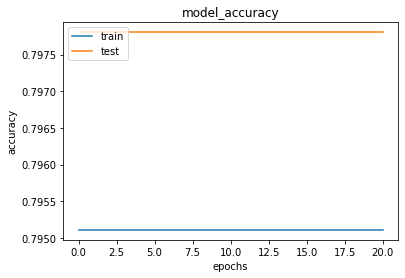

In [190]:
plt.plot(model_histry.history["accuracy"])
plt.plot(model_histry.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train","test"],loc="upper left")
plt.title("model_accuracy")
plt.show()

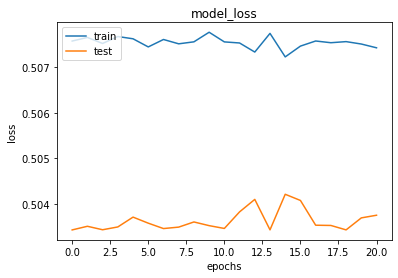

In [191]:
plt.plot(model_histry.history["loss"])
plt.plot(model_histry.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["train","test"],loc="upper left")
plt.title("model_loss")
plt.show()

# prediction

In [192]:
y_pred=classifier.predict(x_test)
y_pred[:5]

63/63 [==============================] - 1s 5ms/step


array([[0.21250552],
       [0.21250552],
       [0.21250552],
       [0.21250552],
       [0.21250552]], dtype=float32)

In [193]:
y_prediction = []
for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [194]:
y_prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [195]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [196]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

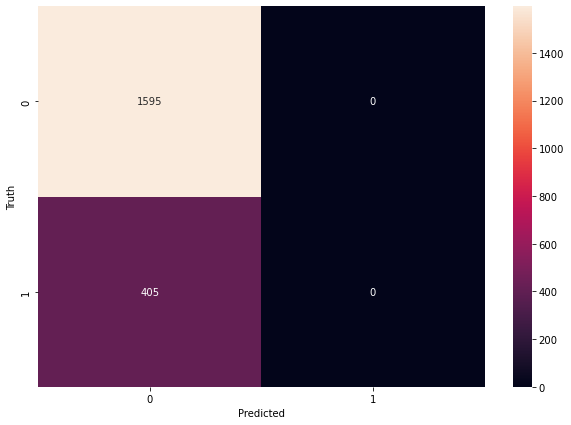

In [197]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
score=accuracy_score(y_prediction,y_test)

In [200]:
score

0.7975

In [2]:
#cnn

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

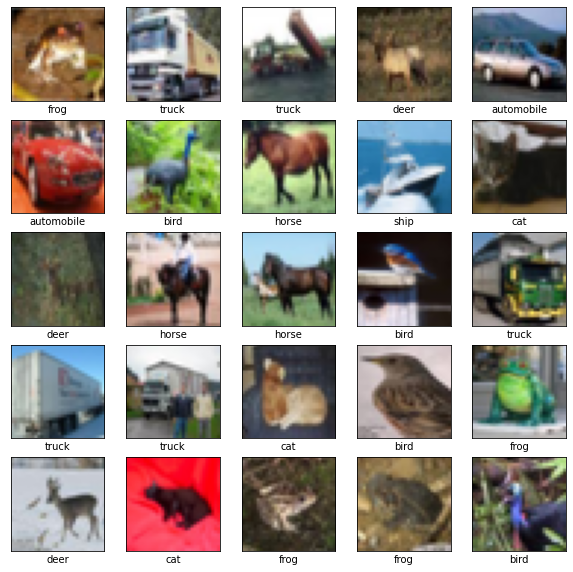

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [1]:
#in below code 32 means the no of filters and 3,3 means the size of filters  and input_shape=32,32 means the pixel of image and 
#the 3 means the color of image 3 means the rgb(red,green,blue)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
#add dense layer

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
#Compile and train the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 168s 104ms/step - loss: 1.5442 - accuracy: 0.4360 - val_loss: 1.2664 - val_accuracy: 0.5456
Epoch 2/10
1563/1563 [==============================] - 168s 108ms/step - loss: 1.1657 - accuracy: 0.5874 - val_loss: 1.0927 - val_accuracy: 0.6144
Epoch 3/10
1563/1563 [==============================] - 171s 109ms/step - loss: 1.0322 - accuracy: 0.6349 - val_loss: 0.9971 - val_accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 176s 113ms/step - loss: 0.9360 - accuracy: 0.6735 - val_loss: 0.9418 - val_accuracy: 0.6734
Epoch 5/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8644 - accuracy: 0.6975 - val_loss: 0.9282 - val_accuracy: 0.6770
Epoch 6/10
1563/1563 [==============================] - 160s 102ms/step - loss: 0.8139 - accuracy: 0.7151 - val_loss: 0.9375 - val_accuracy: 0.6768
Epoch 7/10
1563/1563 [==============================] - 168s 107ms/step - loss: 0.7674 - accuracy: 0.7322 - val_

313/313 - 8s - loss: 0.8792 - accuracy: 0.7062 - 8s/epoch - 26ms/step


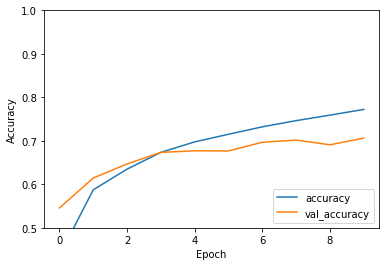

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.7062000036239624


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers,datasets

In [15]:
#load dataset

In [16]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [17]:
x_train.shape   #50000 means the sample and 32x32 means the size of the image and 3 means the rgb(red,green,blue)

(50000, 32, 32, 3)

In [18]:
x_test.shape

(10000, 32, 32, 3)

In [19]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

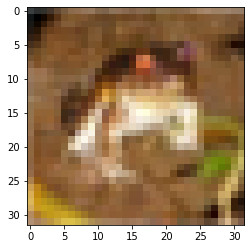

In [20]:
plt.imshow(x_train[0])

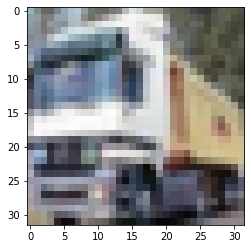

In [21]:
plt.imshow(x_train[1])

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
classes=["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [26]:
classes[9]

'truck'

In [27]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

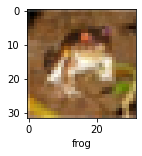

In [28]:
plot_sample(x_train,y_train,0)

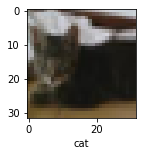

In [29]:
plot_sample(x_train,y_train,9)

In [30]:
#normalizing the data

In [31]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [32]:
x_train=x_train/255
x_test=x_test/255

In [33]:
ann=models.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

In [34]:
ann.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [35]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 288s 179ms/step - loss: 1.8997 - accuracy: 0.3260
Epoch 2/10
1563/1563 [==============================] - 264s 169ms/step - loss: 1.6703 - accuracy: 0.4014
Epoch 3/10
1563/1563 [==============================] - 272s 174ms/step - loss: 1.5900 - accuracy: 0.4277
Epoch 4/10
1563/1563 [==============================] - 276s 176ms/step - loss: 1.5325 - accuracy: 0.4481
Epoch 5/10
1563/1563 [==============================] - 272s 174ms/step - loss: 1.4944 - accuracy: 0.4647
Epoch 6/10
1563/1563 [==============================] - 261s 167ms/step - loss: 1.4667 - accuracy: 0.4762
Epoch 7/10
1563/1563 [==============================] - 261s 167ms/step - loss: 1.4426 - accuracy: 0.4832
Epoch 8/10
1563/1563 [==============================] - 263s 168ms/step - loss: 1.4249 - accuracy: 0.4899
Epoch 9/10
1563/1563 [==============================] - 263s 168ms/step - loss: 1.4037 - accuracy: 0.4982
Epoch 10/10
1563/1563 [=======================

In [36]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 13s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.62      0.62      0.62      1000
           2       0.38      0.23      0.29      1000
           3       0.35      0.31      0.33      1000
           4       0.39      0.47      0.43      1000
           5       0.43      0.33      0.37      1000
           6       0.52      0.50      0.51      1000
           7       0.49      0.62      0.55      1000
           8       0.53      0.68      0.60      1000
           9       0.54      0.54      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.48      0.49      0.48     10000
weighted avg       0.48      0.49      0.48     10000



In [37]:
#build the nueral network

In [38]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #kernel size means the size of the filter
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [39]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 118s 73ms/step - loss: 1.4536 - accuracy: 0.4811
Epoch 2/10
1563/1563 [==============================] - 115s 73ms/step - loss: 1.0995 - accuracy: 0.6151
Epoch 3/10
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9710 - accuracy: 0.6615
Epoch 4/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8876 - accuracy: 0.6906
Epoch 5/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.8183 - accuracy: 0.7148
Epoch 6/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.7622 - accuracy: 0.7355
Epoch 7/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.7145 - accuracy: 0.7534
Epoch 8/10
1563/1563 [==============================] - 140s 89ms/step - loss: 0.6662 - accuracy: 0.7672
Epoch 9/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6309 - accuracy: 0.7813
Epoch 10/10
1563/1563 [==============================] 

In [41]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 12s 35ms/step - loss: 0.8934 - accuracy: 0.7061


[0.8934217691421509, 0.7060999870300293]

In [42]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [43]:
#convert the 2d array into the id

In [44]:
y_test=y_test.reshape(-1,)

In [45]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

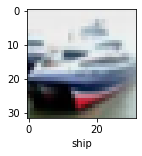

In [46]:
plot_sample(x_test,y_test,1)

In [47]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 10s 31ms/step


array([[1.3559917e-05, 4.8611796e-06, 2.8267116e-04, 8.1833875e-01,
        7.1956724e-04, 1.5378334e-01, 2.4578191e-02, 1.8263181e-06,
        2.2752983e-03, 1.9065142e-06],
       [2.8324443e-05, 1.0315905e-01, 5.9983660e-07, 7.7242248e-09,
        8.0934504e-09, 1.6961711e-10, 3.1423957e-09, 5.7224052e-12,
        8.9680213e-01, 9.9162335e-06],
       [3.7977643e-02, 4.8081927e-02, 5.5815803e-04, 1.1430629e-02,
        5.3841382e-04, 1.4431104e-03, 6.8492093e-04, 1.3399778e-04,
        8.4704435e-01, 5.2106861e-02],
       [7.4260253e-01, 8.9891246e-03, 4.7500819e-02, 4.3719509e-03,
        8.8315926e-02, 1.2136354e-04, 1.8117155e-04, 8.1814913e-05,
        1.0773356e-01, 1.0169220e-04],
       [6.4443334e-06, 2.8003535e-05, 4.1216346e-03, 1.0844544e-01,
        5.3427368e-01, 3.1475089e-03, 3.4988937e-01, 1.4000325e-06,
        8.6468630e-05, 5.4232732e-08]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

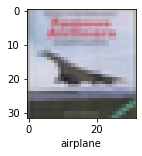

In [50]:
plot_sample(x_test,y_test,3)

In [51]:
classes[y_classes[3]]

'airplane'

In [52]:
classes[y_classes[3]]

'airplane'

In [53]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.85      0.80      0.82      1000
           2       0.60      0.58      0.59      1000
           3       0.53      0.48      0.51      1000
           4       0.66      0.64      0.65      1000
           5       0.59      0.67      0.63      1000
           6       0.73      0.79      0.76      1000
           7       0.76      0.75      0.76      1000
           8       0.80      0.83      0.81      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
from tensorflow import keras

In [56]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
x_train[0].shape

(28, 28)

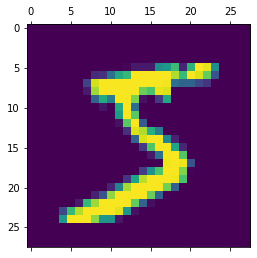

In [60]:
plt.matshow(x_train[0])

In [61]:
y_train[0]

5

In [62]:
X_train = x_train / 255
X_test = x_test / 255

In [63]:
#build the ANN model

In [64]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [65]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 2.3010 - accuracy: 0.8409
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3896 - accuracy: 0.9047
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2875 - accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2444 - accuracy: 0.9370
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2307 - accuracy: 0.9393
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2166 - accuracy: 0.9443
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2037 - accuracy: 0.9477
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2020 - accuracy: 0.9496
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1901 - accuracy: 0.9518
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [66]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.2593 - accuracy: 0.9457


[0.2592747211456299, 0.9456999897956848]

In [67]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [68]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [69]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)), #30 means the filter and (3,3) means the size of the filter
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 103s 54ms/step - loss: 0.5284 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0861 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0604 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0465 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0415 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0329 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0248 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 103s

In [71]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [72]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 22ms/step - loss: 0.1458 - accuracy: 0.9760


[0.14580781757831573, 0.9760000109672546]

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
#import warnings
#warnings.filterwarnings("ignore")
df=pd.read_csv("./sonar_dataset.csv",header=None)

In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [76]:
df.shape

(208, 61)

In [77]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [78]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [79]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [80]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [81]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [82]:
x=df.drop(60,axis="columns")
y=df[60]

In [83]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [84]:
y=pd.get_dummies(y,drop_first=True)

In [85]:
y  #r means the rock and m means the metal

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [86]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [89]:
x_train.shape

(166, 60)

In [90]:
#build the model

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

In [92]:
classifier=Sequential()
classifier.add(Dense(units=60,activation="relu"))


In [93]:
classifier.add(Dense(units=30,activation="relu"))
classifier.add(Dropout(0.2))

In [94]:
classifier.add(Dense(units=15,activation="relu"))
classifier.add(Dropout(0.3))

In [95]:
classifier.add(Dense(units=1,activation="sigmoid"))

In [96]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [97]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
12/12 [==============================] - 7s 146ms/step - loss: 0.6903 - accuracy: 0.5405 - val_loss: 0.6838 - val_accuracy: 0.4909
Epoch 2/50
12/12 [==============================] - 0s 22ms/step - loss: 0.6855 - accuracy: 0.6126 - val_loss: 0.6840 - val_accuracy: 0.4909
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.6855 - accuracy: 0.5135 - val_loss: 0.6857 - val_accuracy: 0.4909
Epoch 4/50
12/12 [==============================] - 0s 26ms/step - loss: 0.6768 - accuracy: 0.6306 - val_loss: 0.6822 - val_accuracy: 0.4909
Epoch 5/50
12/12 [==============================] - 0s 22ms/step - loss: 0.6756 - accuracy: 0.5495 - val_loss: 0.6826 - val_accuracy: 0.4909
Epoch 6/50
12/12 [==============================] - 0s 21ms/step - loss: 0.6536 - accuracy: 0.5856 - val_loss: 0.6879 - val_accuracy: 0.4909
Epoch 7/50
12/12 [==============================] - 0s 21ms/step - loss: 0.6572 - accuracy: 0.5766 - val_loss: 0.6946 - val_accuracy: 0.4909
Epoch 8/50
1

In [98]:
classifier.evaluate(x_test,y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.4740 - accuracy: 0.7857


[0.47400468587875366, 0.7857142686843872]

In [99]:
y_pred=classifier.predict(x_test).reshape(-1)
print(y_pred[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])


2/2 [==============================] - 0s 10ms/step
[0.00381108 0.35234916 0.82681173 0.04635055 0.9817231  0.6702991
 0.27642387 0.992254   0.08810224 0.98678505]
[0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]


In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       0.93      0.64      0.76        22

    accuracy                           0.79        42
   macro avg       0.82      0.79      0.78        42
weighted avg       0.82      0.79      0.78        42



In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [6]:
x_train=np.loadtxt("input_image.csv",delimiter=",")
y_train=np.loadtxt("labels_image.csv",delimiter=",")
x_test=np.loadtxt("input_image_test.csv",delimiter=",")
y_test=np.loadtxt("labels_image_test.csv",delimiter=",")

In [7]:
print("shape of x_train: ",x_train.shape)
print("shape of y_train: ",y_train.shape)
print("shape of x_test: ",x_test.shape)
print("shape of y_test: ",y_test.shape)

shape of x_train:  (2000, 30000)
shape of y_train:  (2000,)
shape of x_test:  (400, 30000)
shape of y_test:  (400,)


In [13]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [14]:
print("shape of x_train: ",x_train.shape)
print("shape of y_train: ",y_train.shape)
print("shape of x_test: ",x_test.shape)
print("shape of y_test: ",y_test.shape)

shape of x_train:  (2000, 100, 100, 3)
shape of y_train:  (2000, 1)
shape of x_test:  (400, 100, 100, 3)
shape of y_test:  (400, 1)


In [15]:
x_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [18]:
import matplotlib.pyplot as plt
import random

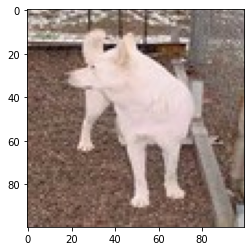

In [26]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [27]:
#model

In [30]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [31]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [33]:
#you can also add the learning rate like this
#optimizer=keras.optimizers.SGD(learning_rate=0.001)


In [35]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 [==============================] - 33s 912ms/step - loss: 0.7016 - accuracy: 0.5285
Epoch 2/10
32/32 [==============================] - 29s 892ms/step - loss: 0.6287 - accuracy: 0.6470
Epoch 3/10
32/32 [==============================] - 28s 886ms/step - loss: 0.5903 - accuracy: 0.6800
Epoch 4/10
32/32 [==============================] - 29s 900ms/step - loss: 0.4975 - accuracy: 0.7560
Epoch 5/10
32/32 [==============================] - 29s 898ms/step - loss: 0.4502 - accuracy: 0.7965
Epoch 6/10
32/32 [==============================] - 29s 901ms/step - loss: 0.4138 - accuracy: 0.8145
Epoch 7/10
32/32 [==============================] - 29s 912ms/step - loss: 0.3391 - accuracy: 0.8530
Epoch 8/10
32/32 [==============================] - 29s 911ms/step - loss: 0.2906 - accuracy: 0.8785
Epoch 9/10
32/32 [==============================] - 30s 939ms/step - loss: 0.2096 - accuracy: 0.9185
Epoch 10/10
32/32 [==============================] - 32s 1s/step - loss: 0.1674 - accuracy:

In [37]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 3s 181ms/step - loss: 0.7999 - accuracy: 0.6875


[0.7998750805854797, 0.6875]

In [39]:
#prediction

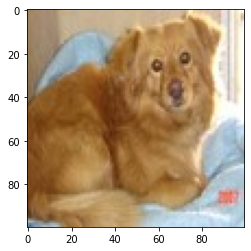

1/1 [==============================] - 0s 78ms/step
[[0.26316172]]


In [51]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

In [52]:
y_pred=y_pred>0.5
if(y_pred==0):
    pred="dog"
else:
    pred="cat"
    
print("our model says it is a:",pred)

our model says it is a: dog


In [ ]:
#transfer learning  using feature extraction

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('archive (1).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
#weihts mien wohi parameter use kareen gaan jo vgg16 ki training mien use hoa tha and 
#include top means the you can neglect or left the dense layer of vgg16 and
#input_shape means the image piexals

In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
#extract the data from folders and given to the model

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#normalize the data into 0 and 1 form 

In [13]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.8845

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#Transfer learning using feature extraction and (data argumentation) to reduce the overfitting

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#transfer learning using fine tuning

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

In [ ]:
conv_base.summary()

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#data argumentation